In [4]:
import pandas as pd
import numpy as np

from scipy.stats import trim_mean
import wquantiles as wq 

In [5]:
medal=pd.read_csv('../datasets/olympics2024.csv')
medal

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


### estimates of location

In [8]:
medal['Total'].mean()

11.417582417582418

In [9]:
print(np.average(medal['Total']))
print(np.average(medal['Silver']))
print(np.average(medal['Bronze']))


11.417582417582418
3.5934065934065935
4.21978021978022


In [10]:
#weighted mean

np.average(medal['Total'], weights=medal['Gold']) 
#total medal count weighted bytheir respective golds

47.734756097560975

In [11]:
np.average(medal['Total'], weights=medal['Total']) 


#Axis must be specified when shapes of a and weights differ

45.04427333974976

In [12]:
#trimmed mean
trim_mean(medal['Silver'],0.1) #10% trimout :slices off leftmost and rightmost 10% scores



1.9452054794520548

In [13]:
print(medal['Silver'].median())
print(medal['Gold'].median())
print(medal['Bronze'].median())

1.0
1.0
2.0


In [14]:
#weighted median
#either by using wquantiles

print(wq.median(medal['Total'],medal['Gold']))

#or creating a func
def weighted_med(df, median_col, weight_col):
    df_sorted=df.sort_values(median_col)
    cumsum=df_sorted[weight_col].cumsum()
    cutoff=df_sorted[weight_col].sum()/2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_med(medal, 'Total', 'Gold')

35.55555555555556


34

In [23]:
#%ile estimate
q3= np.percentile(medal['Total'],75)
q1= np.percentile(medal['Total'],25)
print(q3,'  ', q1)


9.0    2.0


In [26]:
#summary (other estimates)

medal.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


### estimates of variability (dispersion metrics)

In [30]:
from statistics import variance
from statistics import stdev


In [32]:
#variance
variance(medal['Silver'])

45.84395604395604

In [34]:
#std dev.n
stdev(medal['Silver'])

6.770816497584028

In [36]:
#mean absolute deviation : mean of absolute val of all values -the mean
from numpy import mean, absolute, median

mean(absolute(medal['Silver']- mean(medal['Silver'])))

3.8799661876584954

In [38]:
#median abs val (med's better for skewed data)
median(absolute(medal['Silver']- median(medal['Silver'])))

1.0

In [40]:
q1, q3 = np.percentile(medal['Total'], [25, 75 ])  
iqr=q3-q1
iqr


7.0

## data distribution 

In [ ]:
import matplotlib.pyplot as plt

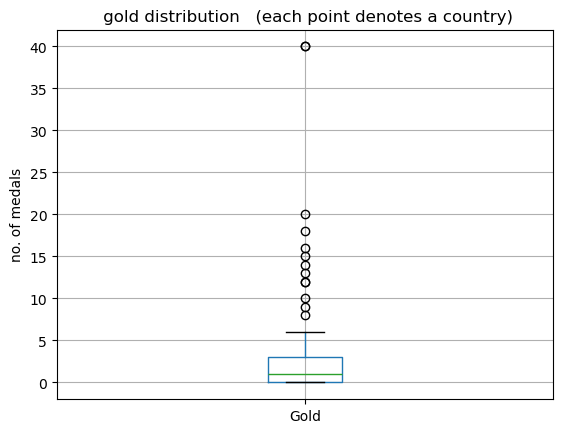

In [85]:
# 1 boxplot
medal.boxplot(column="Gold", by=None, ax=None)
plt.title(' gold distribution   (each point denotes a country)')
plt.ylabel('no. of medals')
plt.show()

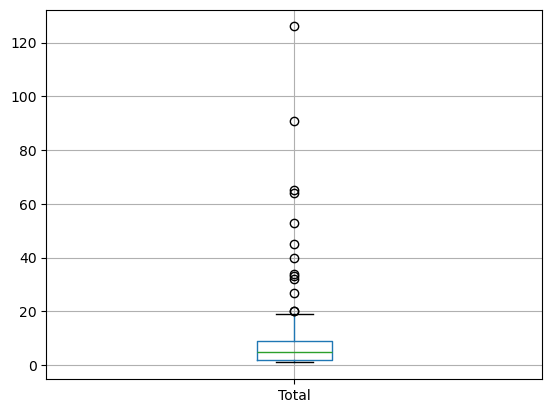

In [87]:
medal.boxplot(column="Total", by=None, ax=None)
plt.show()

In [93]:
#2 frequency table

pd.cut(medal['Silver'],10)
#list(pd.cut(medal['Silver'],10))


0      (39.6, 44.0]
1      (26.4, 30.8]
2       (8.8, 13.2]
3      (17.6, 22.0]
4      (22.0, 26.4]
          ...      
86    (-0.044, 4.4]
87    (-0.044, 4.4]
88    (-0.044, 4.4]
89    (-0.044, 4.4]
90    (-0.044, 4.4]
Name: Silver, Length: 91, dtype: category
Categories (10, interval[float64, right]): [(-0.044, 4.4] < (4.4, 8.8] < (8.8, 13.2] < (13.2, 17.6] ... (26.4, 30.8] < (30.8, 35.2] < (35.2, 39.6] < (39.6, 44.0]]

In [95]:
freq_table=medal.copy()#for better repr with every var
freq_table['freq']=pd.cut(medal['Silver'],10)
print(freq_table )



    Rank        Country Country Code  Gold  Silver  Bronze  Total  \
0      1  United States           US    40      44      42    126   
1      2          China          CHN    40      27      24     91   
2      3          Japan          JPN    20      12      13     45   
3      4      Australia          AUS    18      19      16     53   
4      5         France          FRA    16      26      22     64   
..   ...            ...          ...   ...     ...     ...    ...   
86    84           Peru          PER     0       0       1      1   
87    84          Qatar          QAT     0       0       1      1   
88    84      Singapore          SIN     0       0       1      1   
89    84       Slovakia          SVK     0       0       1      1   
90    84         Zambia          ZAM     0       0       1      1   

             freq  
0    (39.6, 44.0]  
1    (26.4, 30.8]  
2     (8.8, 13.2]  
3    (17.6, 22.0]  
4    (22.0, 26.4]  
..            ...  
86  (-0.044, 4.4]  
87  (-0.044

In [117]:
#get rank
freq_table.groupby('freq')['Rank'].count()

C:\Users\ggkau\AppData\Local\Temp\ipykernel_2116\3259228852.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table.groupby('freq')['Rank'].count()


freq
(-0.044, 4.4]    74
(4.4, 8.8]        8
(8.8, 13.2]       4
(13.2, 17.6]      0
(17.6, 22.0]      2
(22.0, 26.4]      1
(26.4, 30.8]      1
(30.8, 35.2]      0
(35.2, 39.6]      0
(39.6, 44.0]      1
Name: Rank, dtype: int64

In [119]:
freq_table.groupby('freq')['Rank'].count().reset_index()

C:\Users\ggkau\AppData\Local\Temp\ipykernel_2116\2048706559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table.groupby('freq')['Rank'].count().reset_index()


,freq,Rank
0,"(-0.044, 4.4]",74
1,"(4.4, 8.8]",8
2,"(8.8, 13.2]",4
3,"(13.2, 17.6]",0
4,"(17.6, 22.0]",2
5,"(22.0, 26.4]",1
6,"(26.4, 30.8]",1
7,"(30.8, 35.2]",0
8,"(35.2, 39.6]",0
9,"(39.6, 44.0]",1


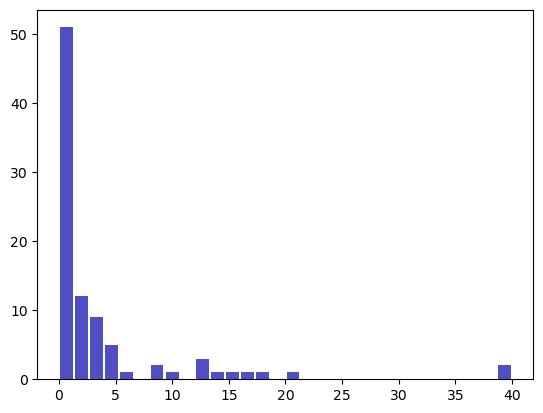

In [121]:
#histograms
plt.hist(x=medal['Gold'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show() 

#can be visualized it's a heavily skewwed ds

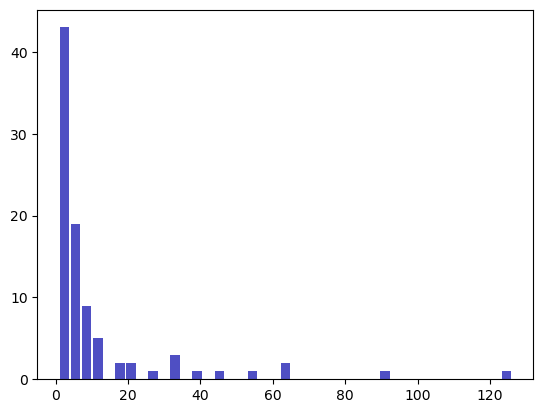

In [187]:
plt.hist(x=medal['Total'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show() 

In [ ]:
#density plots and estimates

ax1=medal['Silver'].plot.hist(density=True)

medal['Silver'].plot.density(ax=ax1)
ax1.set_xlabel('Silver medal density  plot')
plt.show()

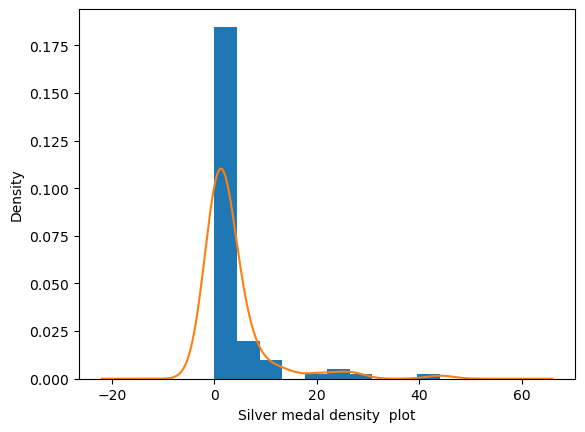

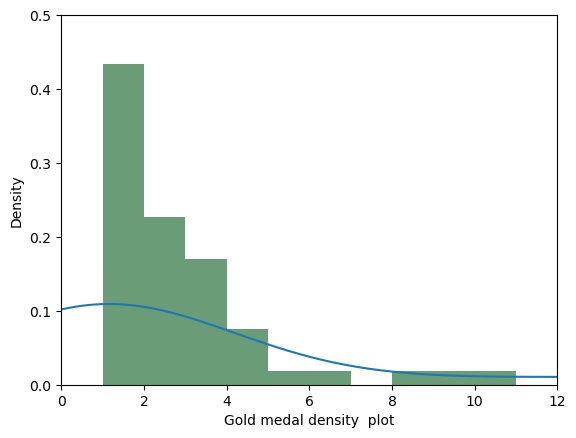

In [231]:
ax2=medal['Gold'].plot.hist(density=True, ylim=[0,0.5],xlim=[0,12], bins=range(1,12), color='#6a9c77')
#param.'bins': till what val of x bins to be shown
medal['Gold'].plot.density(ax=ax2)
ax2.set_xlabel('Gold medal density  plot')
plt.show()

## binary and categorical data

In [248]:
#val that appears most often;mode

medal['Bronze'].mode()


0    1
Name: Bronze, dtype: int64

In [261]:
medal['Gold'].mode(False)#boolean val foe dropna, there's no NA in this  dataset tho


0    0
Name: Gold, dtype: int64

In [353]:
#expected val

medal


,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


In [355]:
a=list(medal['Gold'])
print(a.count(0))
len(a)

28


91

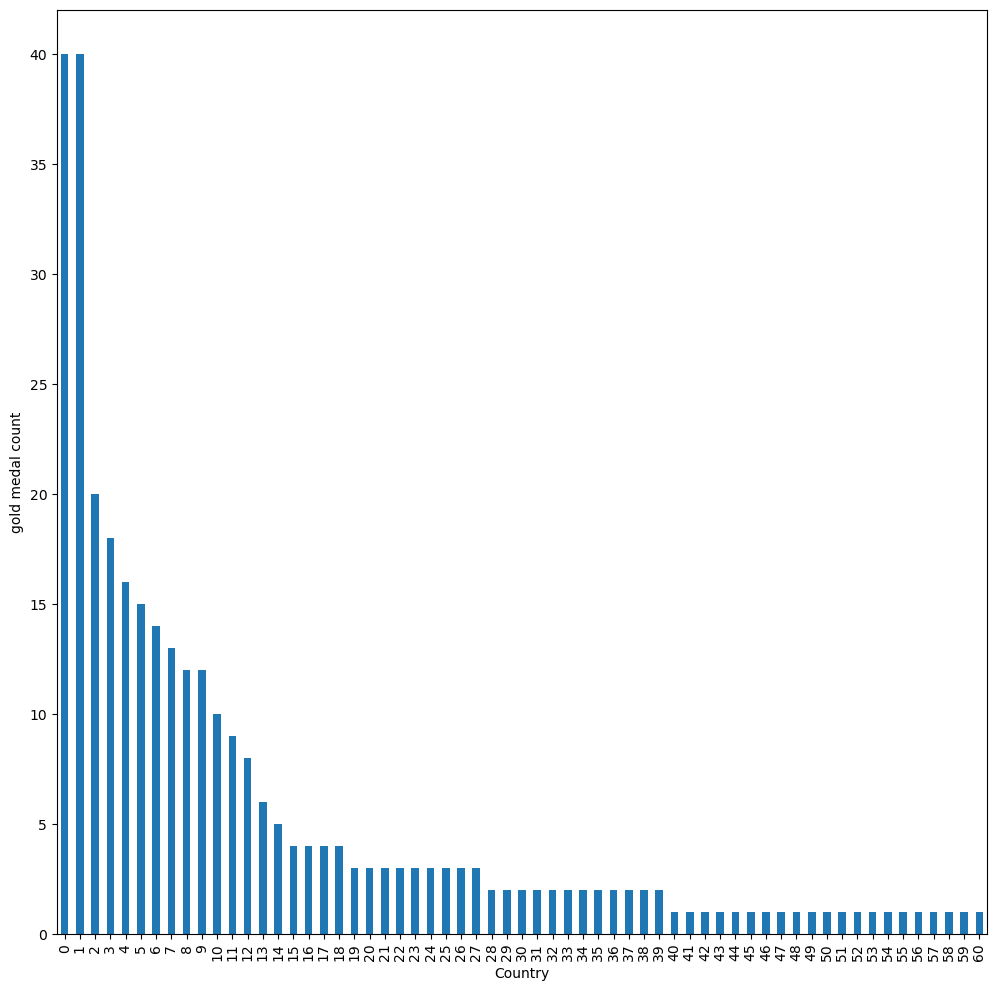

In [357]:
#bar charts
ax=medal['Gold'].iloc[:61].plot.bar(x='Country',y='Gold', figsize=(12,12),legend=False)
#limiting to (91-28)cuz 61 countries have atleast 1 gold
ax.set_xlabel('Country')
ax.set_ylabel('gold medal count')
plt.show()

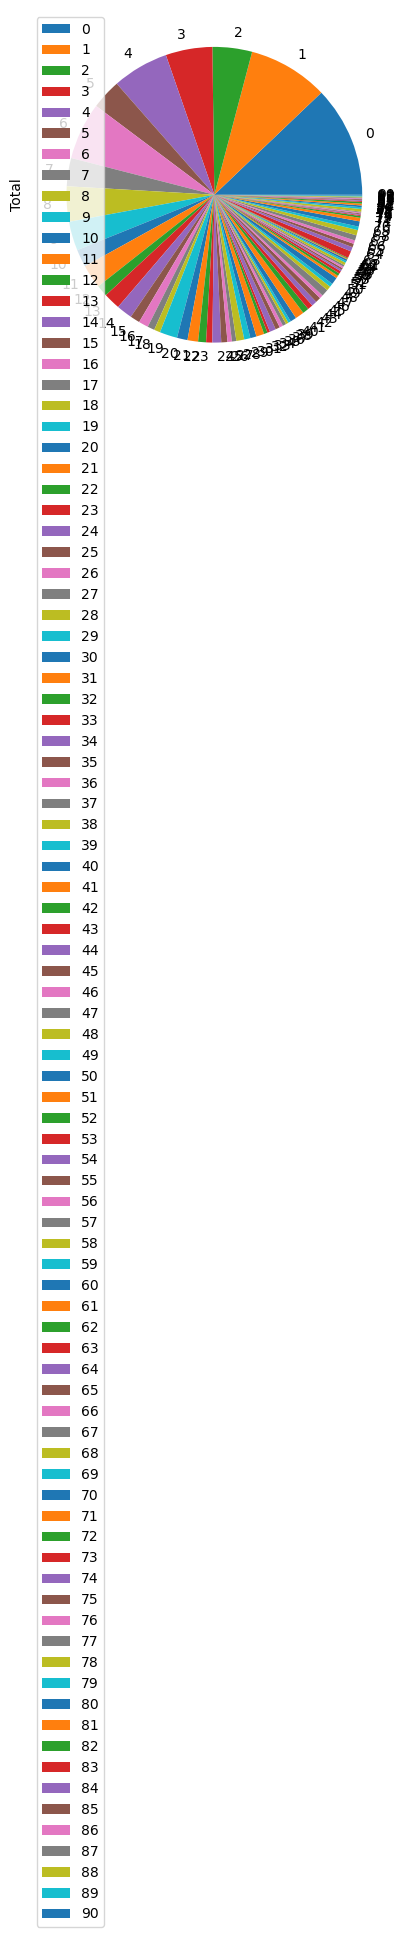

In [409]:
#pie charts
ax=medal.plot.pie(y="Total")
plt.show()

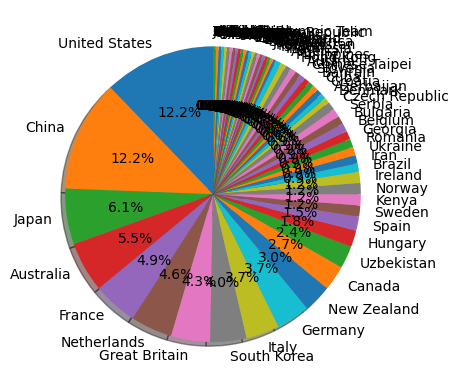

In [442]:
#using matplot
plt.pie(medal['Gold'], labels=medal["Country"], autopct='%1.1f%%', shadow=True, startangle=90)
#medal['Gold']: values to plot (numerical).
#labels=medal["Country"]: corresponding country names.
#autopct='%1.1f%%': show percentage with 1 decimal place.
#startangle=90: rotates the chart so it starts at the top.
plt.show()

In [511]:
list(medal['Gold'])

[40,
 40,
 20,
 18,
 16,
 15,
 14,
 13,
 12,
 12,
 10,
 9,
 8,
 6,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

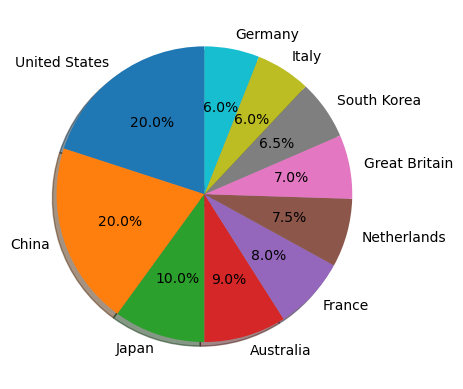

In [ ]:
#limiting for batter vis.zn
pie_data=medal.iloc[:10, :]
plt.pie(pie_data['Gold'], labels=pie_data["Country"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## two or more var comparision

### correlation (bivariate analysis)

#### numerical vs numerical 

In [494]:
#corr btw all variables
corr_data=medal.iloc[:,3:]#can't use 'country(cat column for correlation)
corr_data.corr()
#correlation matrix

,Gold,Silver,Bronze,Total
Gold,1.000000,0.910950,0.880670,0.960993
Silver,0.910950,1.000000,0.940045,0.979767
Bronze,0.880670,0.940045,1.000000,0.968379
Total,0.960993,0.979767,0.968379,1.000000


In [480]:
medal['Silver'].corr(other=medal['Gold'])

0.9109495806020711

In [470]:
medal['Bronze'].corr(other=medal['Gold'])

0.8806701044363456

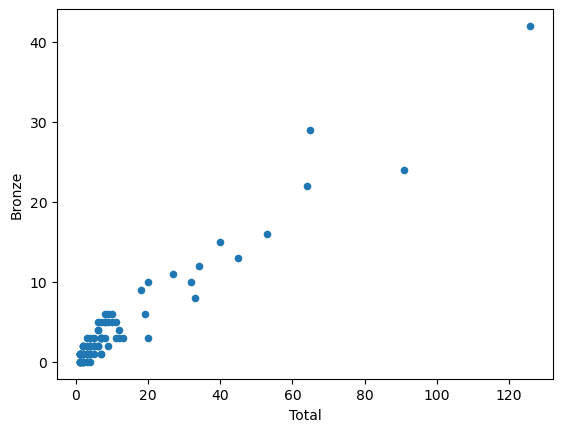

In [694]:
 #scatterplot
medal.plot.scatter(x='Total',y='Bronze')
plt.show()
#can see +ve correlatipon

-0.6565631580454383


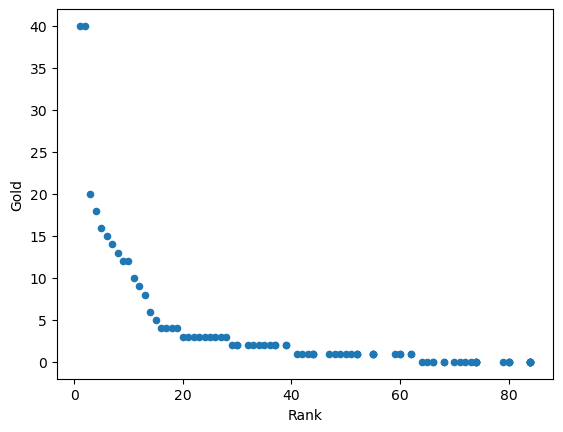

In [516]:
#negative corr will be btw rank and no of gold/silver/bronze/total 
#as greater rank less the medal
print(medal['Rank'].corr(other=medal['Gold']))
medal.plot.scatter(x='Rank',y='Gold')
plt.show()

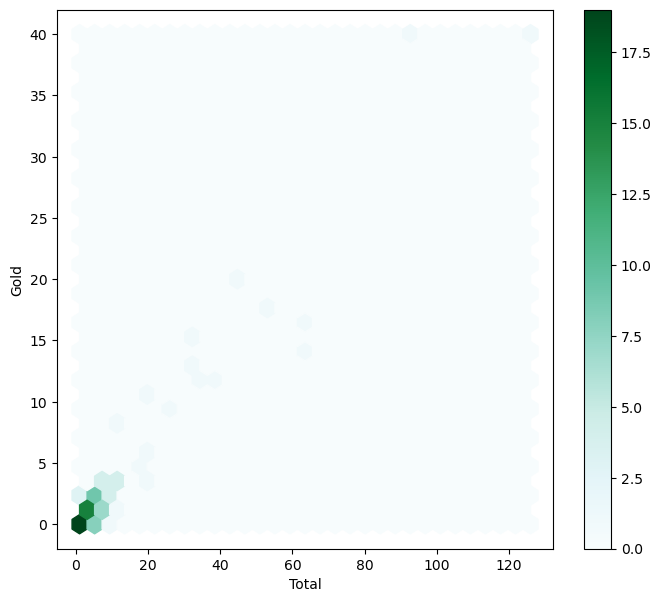

In [559]:
#hexagonal binning 
medal.plot.hexbin(x='Total',y='Gold',gridsize=30, figsize=(8,7),)
plt.show()

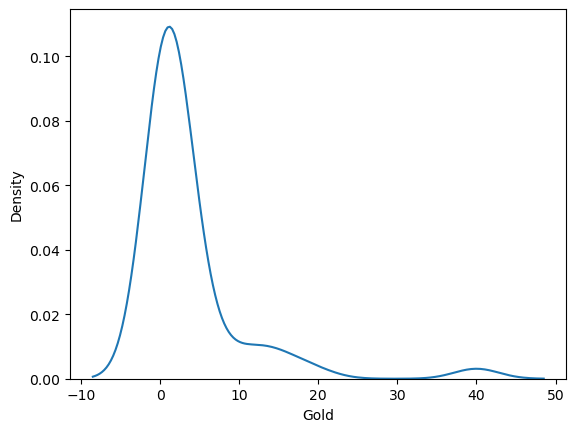

In [696]:
#contour plot
import seaborn as sns
ax=sns.kdeplot(medal['Gold'])
ax
plt.show()



In [599]:
#contour plot for comaprision


# ->  ax=sns.kdeplot(medal['Gold'],medal['Silver'])
#gives:TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given
#as gold silver must be passed as keyword arguments


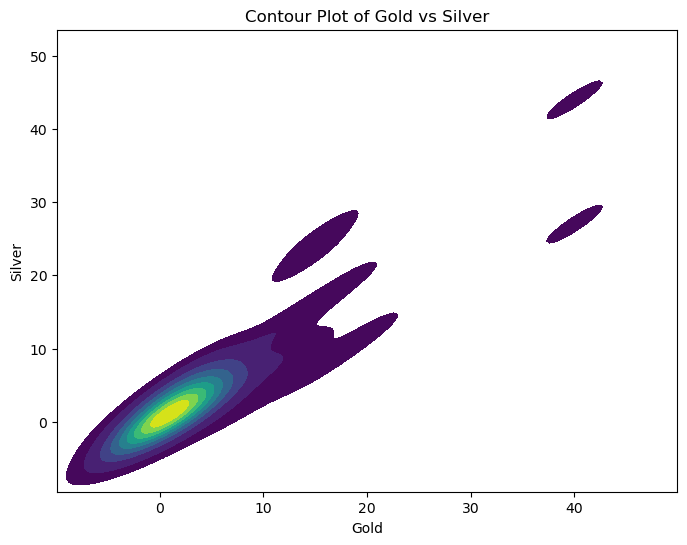

In [595]:
df = pd.DataFrame(medal)

plt.figure(figsize=(8, 6))
ax = sns.kdeplot(data=df, x='Gold', y='Silver', fill=True, cmap='viridis')
plt.title('contour plot of Gold vs Silver')
#fill=True makes it a filled contour plot; omit it for standard contour lines
#cmap='viridis' sets the colormap (you can choose others like "Blues", "magma"
plt.show()

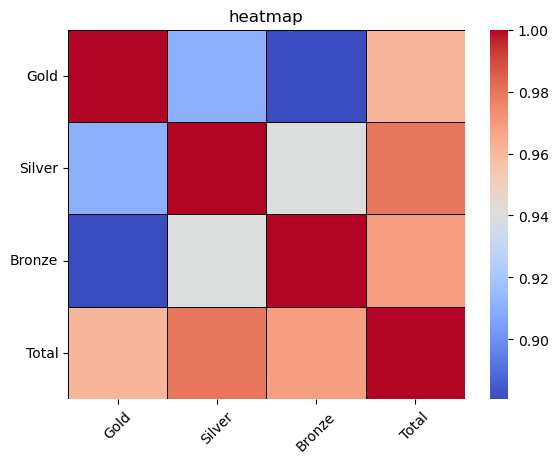

In [634]:
#heat map--to better vis correlation matrix
sns.heatmap(corr_data.corr(),
            cmap="coolwarm",
            fmt=".2f" ,
            linewidths=0.5,
            linecolor='black'),

  #  annot=True, show correlation values
    # fmt=".2f",  format numbers
    # linewidths=0.5, line between boxes
plt.title('heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### categorical vs categorical

In [642]:
#contingeny table 

#no. of countries by Gold medal counts
ct = pd.crosstab(index=medal['Country'], columns=medal['Gold'])
print(ct)

Gold           0   1   2   3   4   5   6   8   9   10  12  13  14  15  16  18  \
Country                                                                         
Albania         1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Algeria         0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
Argentina       0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Armenia         1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Australia       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
...            ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
Uganda          0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Ukraine         0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
United States   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Uzbekistan      0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
Zambia          1   0   0   

In [ ]:
# pivot table showing times each country appears with each Gold medal count in the dataset
ct = medal.pivot_table(index='Country', columns='Gold', aggfunc=lambda x:len(x), fill_value=0)
print(ct)

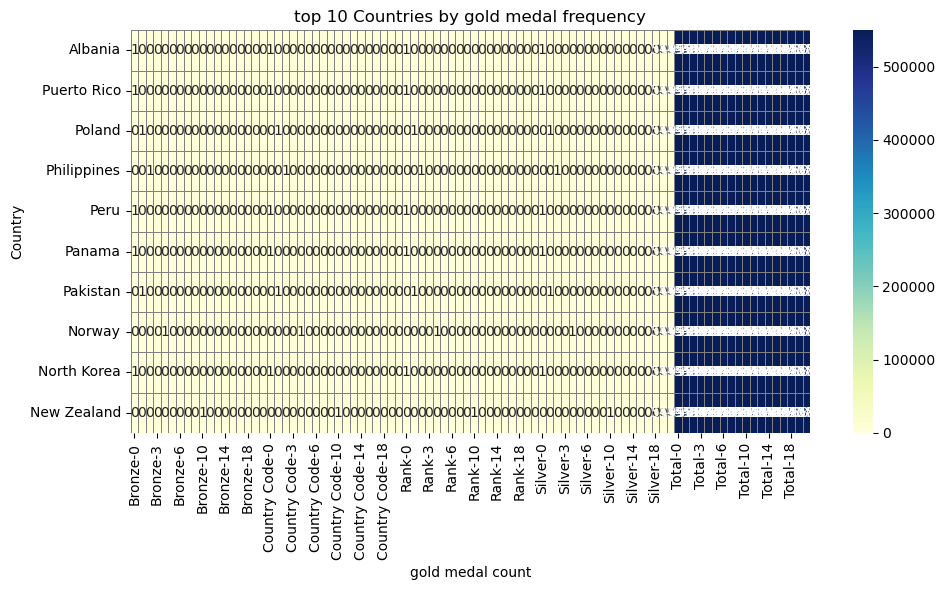

In [681]:
#--visualize pivot table batter

ct['Total_Count'] = ct.sum(axis=1)

ct_top = ct.sort_values(by='Total_Count', ascending=False).head(10)

ct_top = ct_top.drop(columns='Total_Count')
# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ct_top, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("top 10 Countries by gold medal frequency")
plt.xlabel("gold medal count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [685]:
# pivot table showing sum of Silver medals grouped by Country and Gold
ct = medal.pivot_table(index='Country', columns='Gold', values='Silver', aggfunc='sum', fill_value=0)
print(ct)



Gold           0   1   2   3   4   5   6   8   9   10  12  13  14  15  16  18  \
Country                                                                         
Albania         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Algeria         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Argentina       0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Armenia         3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Australia       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19   
...            ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
Uganda          0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Ukraine         0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   
United States   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Uzbekistan      0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   
Zambia          0   0   0   

#### categorical vs numerical

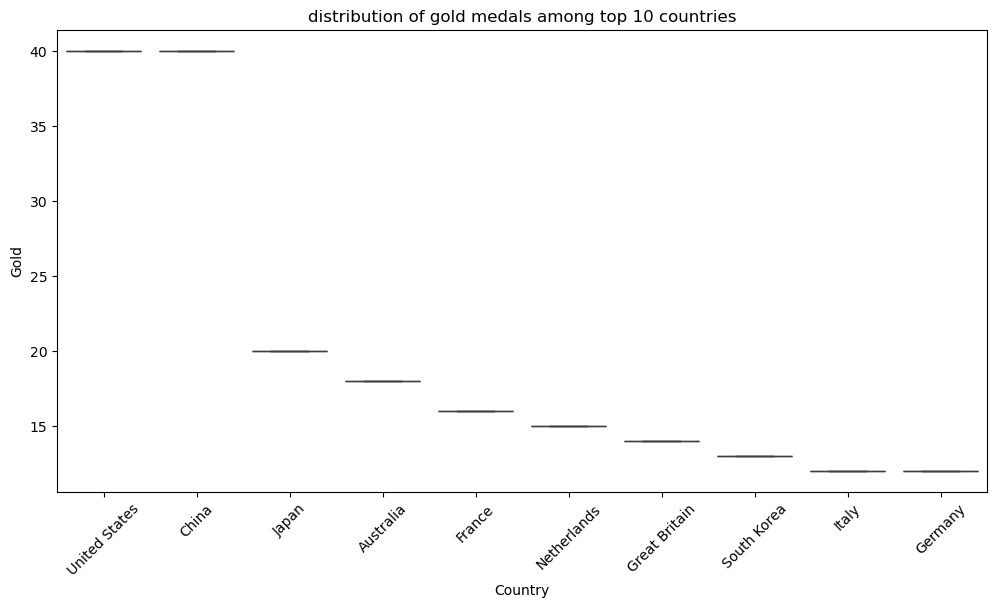

In [725]:
#boxplots
top_countries = medal.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10).index
medal_top = medal[medal['Country'].isin(top_countries)]
plt.figure(figsize=(12, 6))

sns.boxplot(data=medal_top, x='Country', y='Gold')
plt.title("distribution of gold medals among top 10 countries")
plt.xticks(rotation=45)
plt.show()

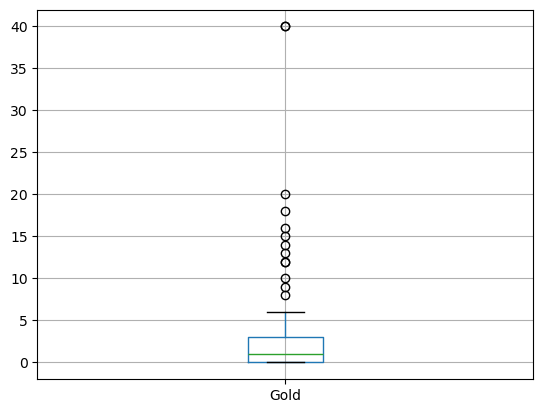

In [733]:
#or
medal.boxplot(column="Gold", by=None, ax=None)
plt.show()

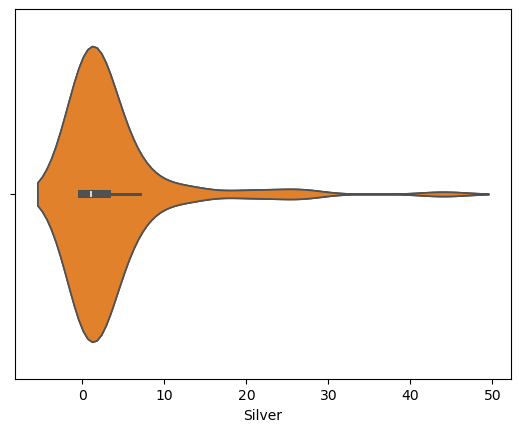

In [716]:
#violin plot
sns.violinplot(x=medal['Silver'])
plt.show()

### categorical heatmap

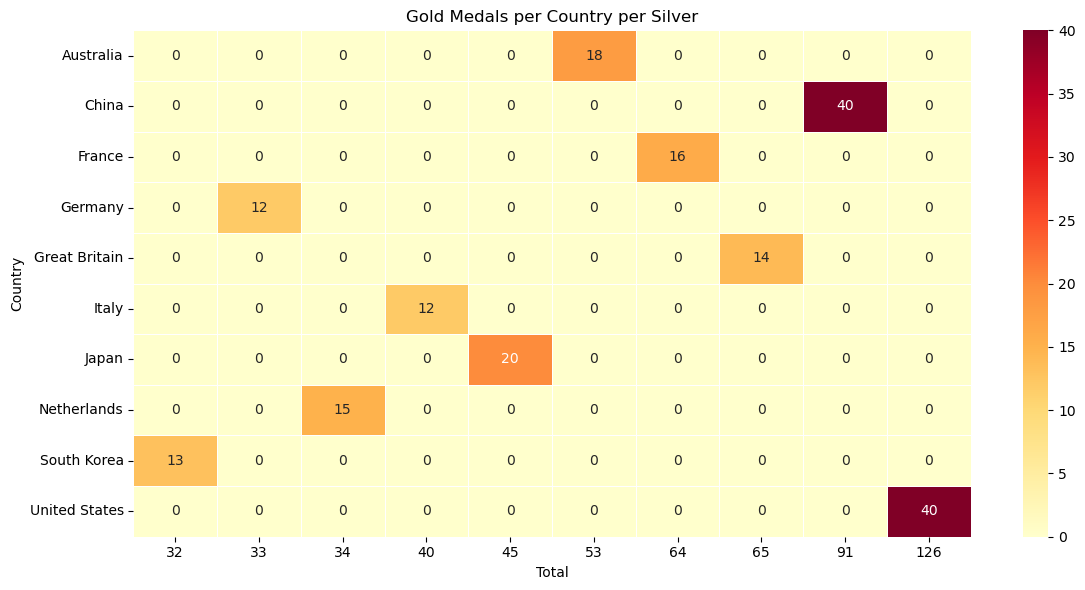

In [750]:
pivot = medal_top.pivot_table(index='Country',columns='Total' ,values='Gold', aggfunc='sum', fill_value=0)

# plot categorical heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Gold Medals per Country per Silver')
plt.xlabel('Total')
plt.ylabel('Country')
plt.tight_layout()
plt.show()